# Show scaledown is working
- show scaledown can find the same circles as the data with full amounts of input
- 3A: % circles
- 3B: n circles
- 3C: venn diagram with full datasets there
- 3D: CPM is correlated?

In [1]:
!ls /tscc/nfs/home/s5xu/scratch/circSTAMP_pipe

1_basic_nextera				  profiles
1_basic_trueseq				  RBM15_OE_KD_rar11_HEK.yaml
2_scaledown				  readme.md
3_circSTAMP_test_edit_circle_level.ipynb  rnaseq.svg
3_pulldown_RIP				  run_code_circSTAMP2.sh
3_pulldown_sucrose			  run_code_circSTAMP.sh
4_EVs					  run_sailor.sh
circ_nextera				  sailor_circ.json
circ_nextera_new			  sailor.json
circSTAMP_command.txt			  scripts
ciriconfig_full_tscc2_mm10.yaml		  slurm-2783894.out
ciriconfig_full_tscc2.yaml		  slurm-2924903.out
ciriconfig_full.yaml			  SnakeBuildIndex.smk
config					  SnakeCircEdit.smk
envs					  SnakeMain.smk
input					  SnakePreprocess.smk
main.svg				  SnakeQC.smk
myrip.svg				  SnakeRIP.smk
notebook				  SnakeRunCIRI.smk
notebook_protocol			  SnakeSailorAnalysis.smk
notes.txt				  stamp.svg
old_2_scaledown


In [2]:
import os
from pybedtools import BedTool
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plot_params import *
from pathlib import Path
import numpy as np

indir = Path('/tscc/nfs/home/s5xu/scratch/circSTAMP_pipe/2_scaledown/output')

indir2 = Path('/tscc/nfs/home/s5xu/scratch/circSTAMP_pipe/1_basic_nextera/output')
indir3 = Path('/tscc/nfs/home/s5xu/scratch/circSTAMP_pipe/1_basic_trueseq/output')

In [3]:
rename_dict = { 
               '50_rar16_re': 'rar11(50ng)',
               '100_rar16_re':'rar11(100ng)',
                '200_rar14_re':'rar11(200ng)',
                '500_rar14_re':'rar11(500ng)'
               ### included
               }
group_color = {
              'rar11(50ng)': 'tomato',
                'rar11(100ng)':'gold',
                'rar11(200ng)':'seagreen',
                'rar11(500ng)':'royalblue',
    'HEK': 'grey',
    'arr': 'black',
    'rar': 'mediumorchid'
              }

In [4]:
mega_anno = pd.read_csv(indir / 'circle_summary/all_circle_annotation.csv', index_col = 0)
stats_df = pd.read_csv(indir / 'circle_summary/ciri_stats.csv', index_col = 0).rename(rename_dict, axis = 0)
counts = pd.read_csv(indir / 'circle_summary/circ_type_counts.csv', index_col = 0).rename(rename_dict, axis = 0)
bsj = pd.read_csv(indir / 'circle_summary/BSJ_counts.csv', index_col = 0).rename(rename_dict, axis = 1)
fsj = pd.read_csv(indir / 'circle_summary/FSJ_counts.csv', index_col = 0).rename(rename_dict, axis = 1)
junc = pd.read_csv(indir / 'circle_summary/junction_ratio.csv', index_col = 0).rename(rename_dict, axis = 1)

In [5]:
mega_anno2 = pd.read_csv(indir2 / 'circle_summary/all_circle_annotation.csv', index_col = 0)
stats_df2 = pd.read_csv(indir2 / 'circle_summary/ciri_stats.csv', index_col = 0).rename(rename_dict, axis = 0)
counts2 = pd.read_csv(indir2 / 'circle_summary/circ_type_counts.csv', index_col = 0).rename(rename_dict, axis = 0)
bsj2 = pd.read_csv(indir2 / 'circle_summary/BSJ_counts.csv', index_col = 0).rename(rename_dict, axis = 1)
fsj2 = pd.read_csv(indir2 / 'circle_summary/FSJ_counts.csv', index_col = 0).rename(rename_dict, axis = 1)
junc2 = pd.read_csv(indir2 / 'circle_summary/junction_ratio.csv', index_col = 0).rename(rename_dict, axis = 1)

In [6]:
mega_anno3 = pd.read_csv(indir3 / 'circle_summary/all_circle_annotation.csv', index_col = 0)
stats_df3 = pd.read_csv(indir3 / 'circle_summary/ciri_stats.csv', index_col = 0).rename(rename_dict, axis = 0)
counts3 = pd.read_csv(indir3 / 'circle_summary/circ_type_counts.csv', index_col = 0).rename(rename_dict, axis = 0)
bsj3 = pd.read_csv(indir3 / 'circle_summary/BSJ_counts.csv', index_col = 0).rename(rename_dict, axis = 1)
fsj3 = pd.read_csv(indir3 / 'circle_summary/FSJ_counts.csv', index_col = 0).rename(rename_dict, axis = 1)
junc3 = pd.read_csv(indir3 / 'circle_summary/junction_ratio.csv', index_col = 0).rename(rename_dict, axis = 1)

In [7]:
# combine
mega_anno = pd.concat([mega_anno,mega_anno2, mega_anno3], axis = 0).reset_index().drop_duplicates('circ_id').set_index('circ_id')
stats_df = pd.concat([stats_df,stats_df2, stats_df3], axis = 0)
counts = pd.concat([counts,counts2, counts3], axis = 0)

In [8]:
bsj=pd.concat([bsj,bsj2, bsj3], axis = 1)
fsj=pd.concat([fsj,fsj2, fsj3], axis = 1)
junc = pd.concat([junc,junc2, junc3], axis = 1)

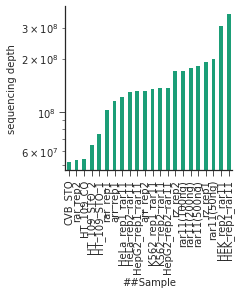

In [9]:
stats_df['##Total_Reads'].sort_values().plot.bar(figsize = (3,3))
plt.ylabel('sequencing depth')
plt.yscale('log')
sns.despine()
#plt.savefig(figdir / '3S_scaledown_seq_depth.pdf')

In [10]:
figure1_sets = [
 'rar11(50ng)',
 'rar11(100ng)',
 'rar11(200ng)',
 'rar11(500ng)',
'HEK_rep1_rar11',
 'HEK_rep2_rar11']

In [11]:
figure1_colors = [group_color[c.split('-')[0].split('_rep')[0]] for c in figure1_sets]

In [12]:
stats_df

,##Total_Reads,##Mapped_Reads,##Circular_Reads,##version,frac_circular,frac_mapped
##Sample,,,,,,
rar11(50ng),198732738,151918924,5457036,1.1.2,0.035921,0.764438
rar11(100ng),171089732,130605566,4972538,1.1.2,0.038073,0.763375
rar11(200ng),176770122,134471888,5145700,1.1.2,0.038266,0.760716
rar11(500ng),182857806,140850546,6313964,1.1.2,0.044827,0.770274
HEK_rep1_rar11,358618734,296082478,9874114,1.1.2,0.033349,0.825619
HEK_rep2_rar11,308033720,238970648,13151380,1.1.2,0.055033,0.775794
HepG2_rep1_rar11,130779974,74448762,7106086,1.1.2,0.095449,0.569267
HepG2_rep2_rar11,136003700,79105702,6130506,1.1.2,0.077498,0.581644
K562_rep1_rar11,134739544,78714242,3956156,1.1.2,0.050260,0.584196


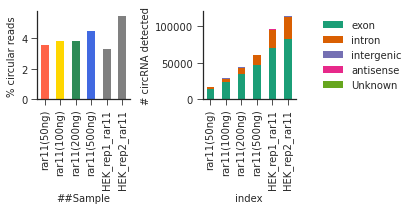

In [13]:
f, ax = plt.subplots(1,2, figsize = (6,3))
(stats_df.loc[figure1_sets, 'frac_circular']*100).plot.bar(
    color = figure1_colors, ax = ax[0])
ax[0].set_ylabel('% circular reads')




counts.loc[figure1_sets].plot.bar(stacked = True, ax = ax[1])
ax[1].set_ylabel('# circRNA detected')
ax[1].legend(bbox_to_anchor = (1.2,1))
sns.despine()
plt.tight_layout()
plt.savefig(figdir / '3_scaledown_perc_circle.pdf')

# Enrichment as measured by junction ratio

In [14]:
from scipy.stats import pearsonr

In [15]:
sub_junc = junc.loc[~(junc['HEK_rep1_rar11'].isnull())&~(junc['HEK_rep2_rar11'].isnull())]
sub_junc_t = sub_junc.T.copy()
sub_junc_t['protocol']=pd.Series(sub_junc.columns).str.split('_', expand = True)[0].tolist()
avg_junc = sub_junc_t.groupby(by = 'protocol').mean().T

In [16]:
(~avg_junc.isnull().any()).sum()

1

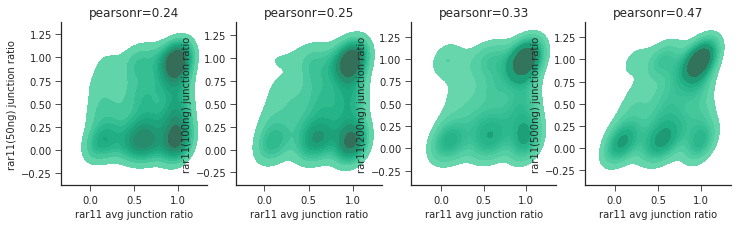

In [17]:
f, axes = plt.subplots(1,4, figsize = (12,3))
for protocol, ax in zip([i for i in figure1_sets if 'ng' in i], axes):
    
    non_nan = avg_junc.loc[~avg_junc[protocol].isnull()]
    if non_nan.shape[0]>500:
        non_nan = non_nan.sample(500)
    sns.kdeplot(data = non_nan, x = f'HEK', y = f'{protocol}', fill = True, ax = ax)
    ax.set_xlabel(f'rar11 avg junction ratio')
    ax.set_ylabel(f'{protocol} junction ratio')
    
    r,p = pearsonr(non_nan[f'{protocol}'],non_nan[f'HEK'])
    ax.set_title(f'pearsonr={r:.2f}')
sns.despine()
plt.savefig(figdir / '3_junc_ratio_vs_scaledown.pdf')

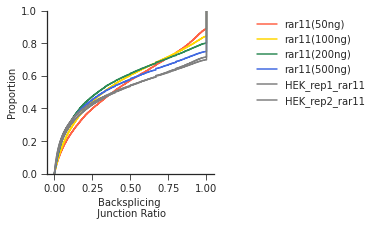

In [18]:
f, ax = plt.subplots(figsize = (3,3))
for col, color in zip(figure1_sets, figure1_colors):
    ax = sns.ecdfplot(data =junc[col].to_frame(), x = col, ax = ax, label = col, color = color)
    ax.set_xlabel('Backsplicing \n Junction Ratio')
ax.legend(bbox_to_anchor = (1.2,1))
#sns.move_legend(ax, "center right")
sns.despine()

In [19]:
# [c for c in enrichment_eff.columns if c!='rz']

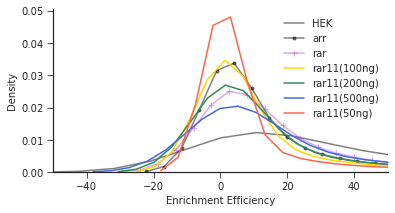

In [20]:
enrichment_eff = avg_junc.loc[avg_junc['rz']>0].div(avg_junc.loc[avg_junc['rz']>0, 'rz'], axis = 0)
f, ax = plt.subplots(figsize = (6,3))
protocols=[
 'HEK',
 'arr',
 'rar',
 'rar11(100ng)',
 'rar11(200ng)',
 'rar11(500ng)',
 'rar11(50ng)']
for protocol in protocols:
    if protocol == 'rar':
        marker = '+'
        alpha = 0.5
    elif protocol == 'arr':
        marker = '.'
        alpha = 0.5
    else:
        marker = None
        alpha = 1
    sns.kdeplot(data = enrichment_eff.fillna(0), x = protocol, label = protocol, ax = ax,
               color = group_color[protocol], marker = marker, alpha = alpha)
ax.legend()
ax.set_xlabel('Enrichment Efficiency')
ax.set_xlim(-50,50)
sns.despine()
plt.savefig(figdir / '3_enrichment_eff.pdf')

# Accuracy

In [21]:
circname = {}
for name in bsj.columns:
    circname[name] = set(bsj[name].dropna().index)

In [22]:
circname.keys()

dict_keys(['rar11(50ng)', 'rar11(100ng)', 'rar11(200ng)', 'rar11(500ng)', 'HEK_rep1_rar11', 'HEK_rep2_rar11', 'HepG2_rep1_rar11', 'HepG2_rep2_rar11', 'K562_rep1_rar11', 'K562_rep2_rar11', 'HeLa_rep1_rar11', 'HeLa_rep2_rar11', 'HT_109_CO', 'HT_109_STO_1', 'HT_109_STO_2', 'CVB_STO', 'arr_rep1', 'rz_rep1', 'rar_rep1', 'rar_rep2', 'arr_rep2', 'rz_rep2'])

In [23]:
circname_reproducible = {}
for protocol in ['HEK']:
    circname_reproducible[protocol]=circname[f'{protocol}_rep1_rar11'].intersection(circname[f'{protocol}_rep2_rar11'])
for lbl in [i for i in figure1_sets if 'ng' in i]:
    circname_reproducible[lbl]=circname[lbl]

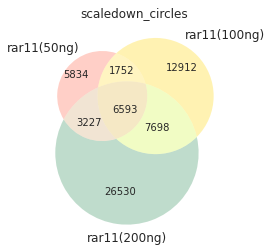

In [24]:
from matplotlib_venn import venn3
labels = [i for i in figure1_sets if 'ng' in i]
venn3([circname[p] for p in labels[:-1]]
      , set_labels = tuple(labels[:-1]), 
      set_colors = (group_color[p] for p in labels[:-1]),
      alpha = 0.3
     )
plt.title('scaledown_circles')
plt.savefig(figdir / '3_venn_3concentration-1.pdf')

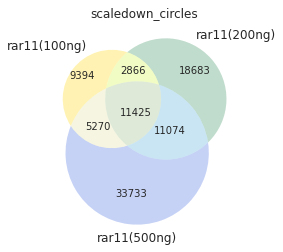

In [25]:
venn3([circname[p] for p in labels[1:]]
      , set_labels = tuple(labels[1:]), 
      set_colors = (group_color[p] for p in labels[1:]),
      alpha = 0.3
     )
plt.title('scaledown_circles')
plt.savefig(figdir / '3_venn_3concentration-2.pdf')

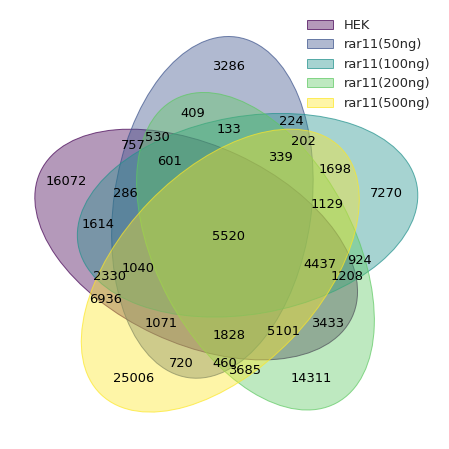

In [26]:
from venn import venn
venn(circname_reproducible)
plt.savefig(figdir / '3_venn_5procotol.pdf')

In [27]:
# percent reproducible circles recovered from rar11 replicates

In [28]:

detected_t = ~bsj.isnull().T
detected_t['protocol']=pd.Series(bsj.columns).str.split('_', expand = True)[0].tolist()
detected_both = detected_t.groupby(by = 'protocol').all().T
detected_both.columns = ['detected_'+c for c in detected_both.columns]


In [29]:
protocols=[
 'HEK',
 'arr',
 'rar',
    'rz',
 'rar11(100ng)',
 'rar11(200ng)',
 'rar11(500ng)',
 'rar11(50ng)']

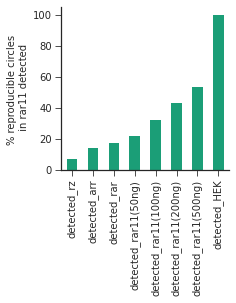

In [30]:
(detected_both.loc[detected_both['detected_HEK'], [f'detected_{p}' for p in protocols]].mean(axis = 0)*100).sort_values(
    ).plot.bar(figsize = (3,3))
plt.ylabel('% reproducible circles \n in rar11 detected')
sns.despine()
plt.savefig(figdir / '3_perc_detected_inrar11.pdf')

In [31]:
from scipy.stats import pearsonr
def get_pearsonr_dropna(df, col1, col2):
    sub = df[[col1, col2]].dropna()
    r,p=pearsonr(sub[col1], sub[col2])
    return r,p

In [32]:
cpm=bsj.div(stats_df['##Total_Reads'], axis = 1)*10**6

In [33]:
cpm_t = cpm.loc[(cpm['rz_rep1']>0)&(cpm['rz_rep2']>0)].T.copy()
cpm_t['protocol']=pd.Series(cpm.columns).str.split('_', expand = True)[0].tolist()
avg_cpm = cpm_t.groupby(by = 'protocol').mean().T

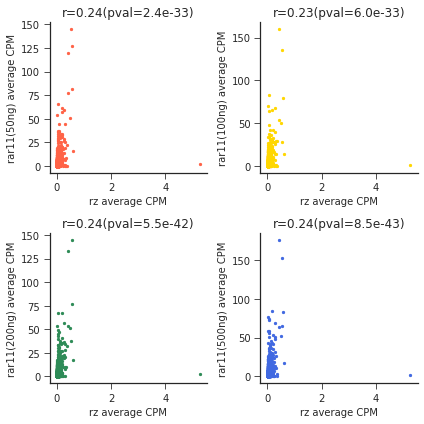

In [34]:
f, axes = plt.subplots(2,2, figsize = (6,6))
for protocol, ax in zip(figure1_sets, axes.flatten()):

    avg_cpm.plot.scatter(y = f'{protocol}', x = f'rz', ax = ax, 
                     color = group_color[protocol], marker = '.')
    r,p = get_pearsonr_dropna(avg_cpm, f'{protocol}', f'rz')
    ax.set_title(f'r={r:.2f}(pval={p:.1e})')
    ax.set_xlabel(f'rz average CPM')
    ax.set_ylabel(f'{protocol} average CPM')


plt.tight_layout()
sns.despine()
plt.savefig(figdir / '3_scaledown_CPM_corr_w_rz.pdf')

In [35]:
cpm_t = cpm.T.copy()
cpm_t['protocol']=pd.Series(cpm.columns).str.split('_', expand = True)[0].tolist()
avg_cpm = cpm_t.groupby(by = 'protocol').mean().T

In [36]:
bsj.shape, cpm.shape

((430683, 22), (430683, 22))

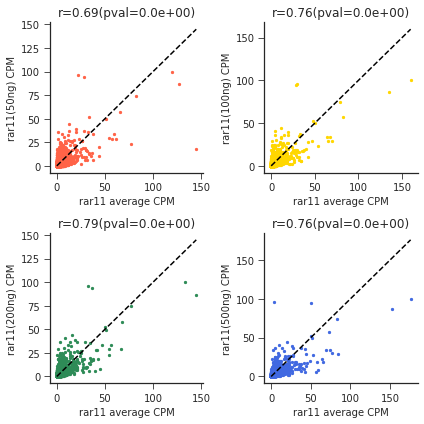

In [37]:
f, axes = plt.subplots(2,2, figsize = (6,6))
for protocol, ax in zip(figure1_sets, axes.flatten()):

    avg_cpm.plot.scatter(x = f'{protocol}', y = f'HEK', ax = ax, 
                     color = group_color[protocol], marker = '.')
    r,p = get_pearsonr_dropna(avg_cpm, f'{protocol}', f'HEK')
    ax.set_title(f'r={r:.2f}(pval={p:.1e})')
    ax.set_xlabel(f'rar11 average CPM')
    ax.set_ylabel(f'{protocol} CPM')
    ax.plot([0, max(avg_cpm[protocol].max(), avg_cpm['HEK'].max())],
            [0, max(avg_cpm[protocol].max(), avg_cpm['HEK'].max())],
            '--',
            color = 'black'
           )


plt.tight_layout()
sns.despine()
plt.savefig(figdir / '3_CPM_corr_w_rar11.pdf')

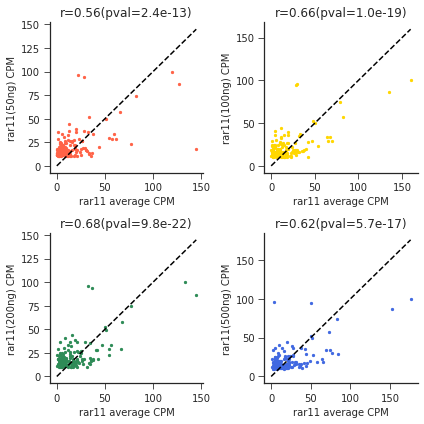

In [38]:
f, axes = plt.subplots(2,2, figsize = (6,6))
for protocol, ax in zip(figure1_sets, axes.flatten()):
    highexp = avg_cpm.loc[avg_cpm['HEK']>10]
    highexp.plot.scatter(x = f'{protocol}', y = f'HEK', ax = ax, 
                     color = group_color[protocol], marker = '.')
    r,p = get_pearsonr_dropna(highexp, f'{protocol}', f'HEK')
    ax.set_title(f'r={r:.2f}(pval={p:.1e})')
    ax.set_xlabel(f'rar11 average CPM')
    ax.set_ylabel(f'{protocol} CPM')
    ax.plot([0, max(avg_cpm[protocol].max(), avg_cpm['HEK'].max())],
            [0, max(avg_cpm[protocol].max(), avg_cpm['HEK'].max())],
            '--',
            color = 'black'
           )


plt.tight_layout()
sns.despine()
plt.savefig(figdir / '3_CPM_corr_w_rar11.pdf')

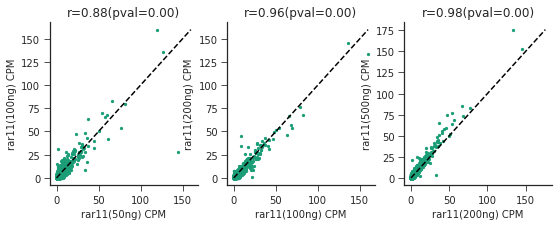

In [39]:
f, axes = plt.subplots(1,3, figsize = (9,3))
for protocol1, protocol2, ax in zip(figure1_sets[:-1], figure1_sets[1:], axes.flatten()):
    cpm.plot.scatter(x = protocol1, y = protocol2, ax = ax, 
                     marker = '.')
    r,p = get_pearsonr_dropna(cpm, protocol1, protocol2)
    ax.set_title(f'r={r:.2f}(pval={p:.2f})')
    ax.set_xlabel(f'{protocol1} CPM')
    ax.set_ylabel(f'{protocol2} CPM')
    ax.plot([0, max(avg_cpm[protocol1].max(), avg_cpm[protocol2].max())],
            [0, max(avg_cpm[protocol1].max(), avg_cpm[protocol2].max())],
            '--',
            color = 'black'
           )
sns.despine()

In [40]:
avg_cpm

protocol,CVB,HEK,HT,HeLa,HepG2,K562,arr,rar,rar11(100ng),rar11(200ng),rar11(500ng),rar11(50ng),rz
chr1:805799|810170,2.667773,0.398506,1.422820,2.183233,1.900631,0.748550,NaN,NaN,NaN,0.475193,0.257030,0.488093,NaN
chr1:925922|939460,NaN,0.019478,NaN,NaN,NaN,NaN,NaN,0.009750,NaN,NaN,NaN,0.055351,NaN
chr1:1223244|1228946,NaN,0.022516,0.045903,NaN,0.033675,0.018453,0.174818,0.089205,0.02338,0.050914,0.016406,0.070446,0.005865
chr1:1255234|1257310,NaN,0.058268,NaN,0.028407,NaN,0.066256,0.063254,NaN,NaN,0.028285,0.027344,0.040255,NaN
chr1:1256045|1267992,0.057578,1.789970,0.067887,1.149562,0.379836,1.535591,0.092801,0.406326,NaN,0.260225,0.388280,0.171084,0.011070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:139870255|139930360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005865
chrX:147937553|147940662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005865
chrX:152343278|152457574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005865
chrX:154446510|154448555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005865


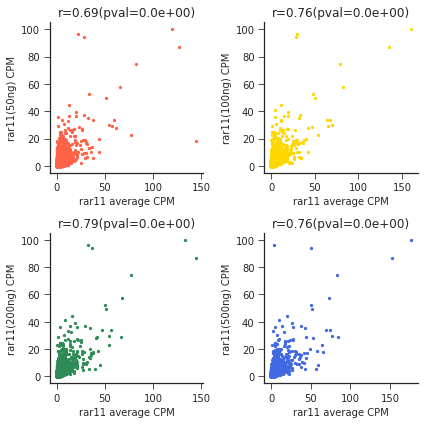

In [41]:
f, axes = plt.subplots(2,2, figsize = (6,6))
for protocol, ax in zip(figure1_sets, axes.flatten()):

    avg_cpm.plot.scatter(x = f'{protocol}', y = f'HEK', ax = ax, 
                     color = group_color[protocol], marker = '.')
    r,p = get_pearsonr_dropna(avg_cpm, f'{protocol}', f'HEK')
    ax.set_title(f'r={r:.2f}(pval={p:.1e})')
    ax.set_xlabel(f'rar11 average CPM')
    ax.set_ylabel(f'{protocol} CPM')


plt.tight_layout()
sns.despine()
plt.savefig(figdir / '3_CPM_corr_w_rar11.pdf')

In [42]:
mionco_df = pd.read_csv('/tscc/projects/ps-yeolab5/hsher/mioncocirc/v0.1.release.txt', sep = '\t')
mionco_df['circ_id']=mionco_df['chr']+':'+(mionco_df['start']+1).astype(str)+'|'+mionco_df['end'].astype(str)

In [43]:
mega = pd.concat([detected_both, cpm, mega_anno], axis = 1)
mega['is_miOncoCirc']=mega.index.isin(mionco_df['circ_id'])

In [44]:
[c for c in mega.columns if c.startswith('detected_') and 'rar11' in c or 'detected_HEK' in c]

['detected_HEK',
 'detected_rar11(100ng)',
 'detected_rar11(200ng)',
 'detected_rar11(500ng)',
 'detected_rar11(50ng)']

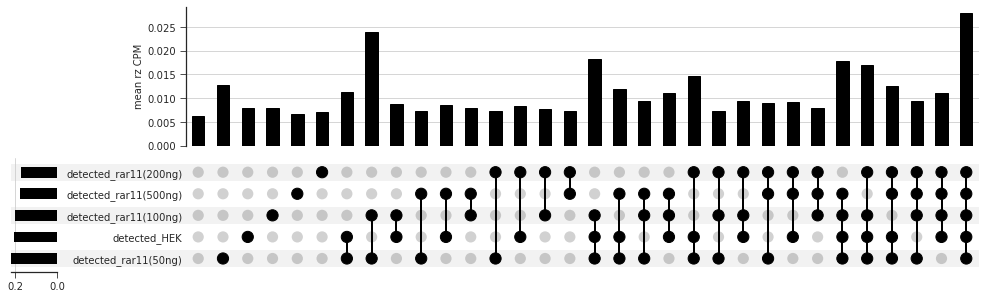

In [45]:
from upsetplot import plot
plot(mega.groupby(by = [c for c in mega.columns if c.startswith('detected_') and 'rar11' in c or 'detected_HEK' in c])['rz_rep1'].mean(),
    )
plt.ylabel('mean rz CPM')
plt.savefig(figdir / '3_scaledown_mean_CPM_upset.pdf')

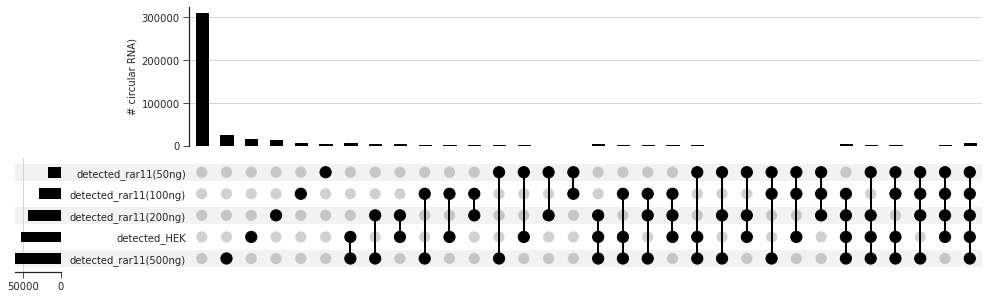

In [46]:

plot(mega.groupby(by = [c for c in mega.columns if c.startswith('detected_') and 'rar11' in c or 'detected_HEK' in c]).count()['gene_name'],
    )
plt.ylabel('# circular RNA)')
plt.savefig(figdir / '3_count_circRNA.pdf')

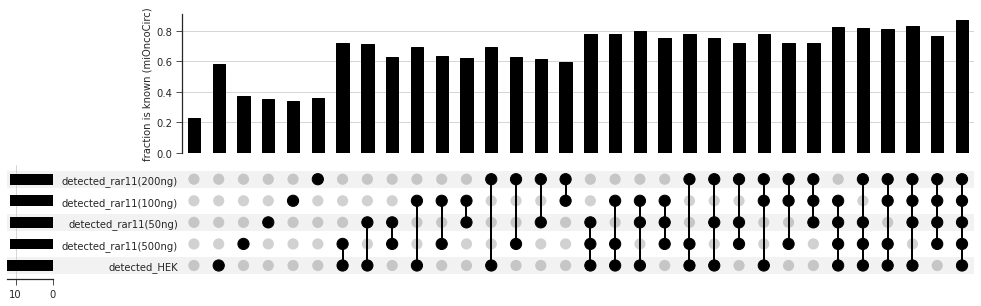

In [47]:

plot(mega.groupby(by = [c for c in mega.columns if c.startswith('detected_') and 'rar11' in c or 'detected_HEK' in c])['is_miOncoCirc'].mean(),
    )
plt.ylabel('fraction is known (miOncoCirc)')
plt.savefig(figdir / '3_fraction_miOncoCirc.pdf')